In [58]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno


sns.set_style("whitegrid")


# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')


# 윈도우 시각화 한글 꺠짐 현상 방지
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
# Data Load
df = pd.read_csv("titanic_train.csv")
print("Data Shape:", df.shape)
df.head()

Data Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 결측치 보안 진행
##################################################################################################################################################################################
##################################################################################################################################################################################
##################################################################################################################################################################################

In [6]:
# 결측치 파악 1
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

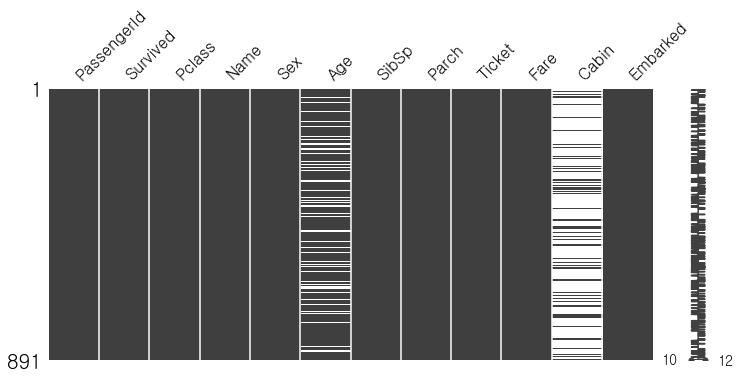

In [7]:
## 결측치 시각화 2
msno.matrix(df=df.iloc[:, :], figsize=(12,5))
#msno.bar(df=df.iloc[:, :])

# Age, Cabin에 가장많은 결측치가 존재

In [8]:
## Age 결측치 보안  --> 수정 필요# Age 결측치 보안  --> 수정 필요
# 성별로 산사람 기준, 죽은사람 기준으로 하여 "중앙값 (median)" 으로 결측치 해결 예정

# 남자 - 죽은 사람 기준
male_dead_median = df[(df["Sex"] == "male") & (df["Survived"] == 0)]["Age"].median()
df[df.isnull()["Age"]].loc[(df["Sex"] == "male") & (df["Survived"] == 0), "Age"] = male_dead_median
# 남자 - 산 사람 기준
male_survived_median = df[(df["Sex"] == "male") & (df["Survived"] == 1)]["Age"].median()
df[df.isnull()["Age"]].loc[(df["Sex"] == "male") & (df["Survived"] == 1), "Age"] = male_survived_median


# 여자 - 죽은 사람 기준
female_dead_median = df[(df["Sex"] == "female") & (df["Survived"] == 0)]["Age"].median()
df[df.isnull()["Age"]].loc[(df["Sex"] == "female") & (df["Survived"] == 0), "Age"] = female_dead_median

# 여자 - 산 사람 기준
female_survived_median = df[(df["Sex"] == "female") & (df["Survived"] == 1)]["Age"].median()
df[df.isnull()["Age"]].loc[(df["Sex"] == "female") & (df["Survived"] == 1), "Age"] = female_survived_median


In [9]:
# Cabin 컬럼 삭재 및 확인
del df["Cabin"]
print(df.shape)
df.head()

(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# 최종 결과 확인 1
df.dropna(axis=0, inplace=True)
print("최종 결측치 확인")
df.isnull().sum()

최종 결측치 확인


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
# 최종 결과 확인 2
print("Data Shape:", df.shape)
df.head()

Data Shape: (712, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
# Test
#df["Name"].str.split(" ")[0][1]
## 이름 타이틀 추출
name_title_container = []

for i in df["Name"]:
    #print(i.split(" ")[1])
    name_title_container.append(i.split(" ")[1])

print(name_title_container[:5])

['Mr.', 'Mrs.', 'Miss.', 'Mrs.', 'Mr.']


In [13]:
for i in range(len(name_title_container)):
    if name_title_container[i] == "Mr.":
        continue
    elif name_title_container[i] == "Mrs.":
        continue
    elif name_title_container[i] == "Miss.":
        continue
    else:
        name_title_container[i] = "Others"

print(name_title_container[:5])

['Mr.', 'Mrs.', 'Miss.', 'Mrs.', 'Mr.']


In [14]:
# 이름 타이틀 df에 추가
df["Name_title"] = name_title_container
print("Data Shape:", df.shape)
df.head()
#del df["name_title"]

Data Shape: (712, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


In [15]:
# Age 범주화
df["Age"].loc[(df["Age"] >= 0) & (df["Age"] < 10)] = 0
df["Age"].loc[(df["Age"] >= 10) & (df["Age"] < 20)] = 10
df["Age"].loc[(df["Age"] >= 20) & (df["Age"] < 30)] = 20
df["Age"].loc[(df["Age"] >= 30) & (df["Age"] < 40)] = 30
df["Age"].loc[(df["Age"] >= 40) & (df["Age"] < 50)] = 40
df["Age"].loc[(df["Age"] >= 50) & (df["Age"] < 60)] = 50
df["Age"].loc[(df["Age"] >= 60) & (df["Age"] < 70)] = 60
df["Age"].loc[(df["Age"] >= 70) & (df["Age"] < 80)] = 70
df["Age"].loc[(df["Age"] >= 80) & (df["Age"] < 90)] = 80

In [16]:
# Fare 범주화 
bins = [0, 20, 60, 100, 1000]
bin_names = ["Low", "Medium", "High", "ExtremlyHigh"]

df["Fare_category"] = pd.cut(df["Fare"],
                                bins=bins,
                                labels=bin_names,
                                include_lowest=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_title,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,20.0,1,0,A/5 21171,7.2500,S,Mr.,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30.0,1,0,PC 17599,71.2833,C,Mrs.,High
2,3,1,3,"Heikkinen, Miss. Laina",female,20.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30.0,1,0,113803,53.1000,S,Mrs.,Medium
4,5,0,3,"Allen, Mr. William Henry",male,30.0,0,0,373450,8.0500,S,Mr.,Low


In [17]:
# Fare_categorize 완료
df["Fare_category"].value_counts()

Low             391
Medium          216
High             57
ExtremlyHigh     48
Name: Fare_category, dtype: int64

In [18]:
# Name_title 추출 완료
df["Name_title"].value_counts()

Mr.       385
Miss.     142
Mrs.      103
Others     82
Name: Name_title, dtype: int64

In [19]:
# SibSp + Parch = Family_size
# SibSp -> 함께 탑승한 형제 자매 또는 배우자
# Parch -> 함께 탑승한 부모, 아이의 수

df["Family_size"] = df["SibSp"] + df["Parch"]

In [20]:
# 전처리 결과 저장 --> "titanic_v1.csv"
df.to_csv("titanic_v1.csv")

In [21]:
# 시각화에 사용된 데이터 ----- EDA Data set prepared
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_title,Fare_category,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,20.0,1,0,A/5 21171,7.2500,S,Mr.,Low,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30.0,1,0,PC 17599,71.2833,C,Mrs.,High,1
2,3,1,3,"Heikkinen, Miss. Laina",female,20.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,Low,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30.0,1,0,113803,53.1000,S,Mrs.,Medium,1
4,5,0,3,"Allen, Mr. William Henry",male,30.0,0,0,373450,8.0500,S,Mr.,Low,0


In [22]:
# EDA 진행
##################################################################################################################################################################################
##################################################################################################################################################################################
##################################################################################################################################################################################

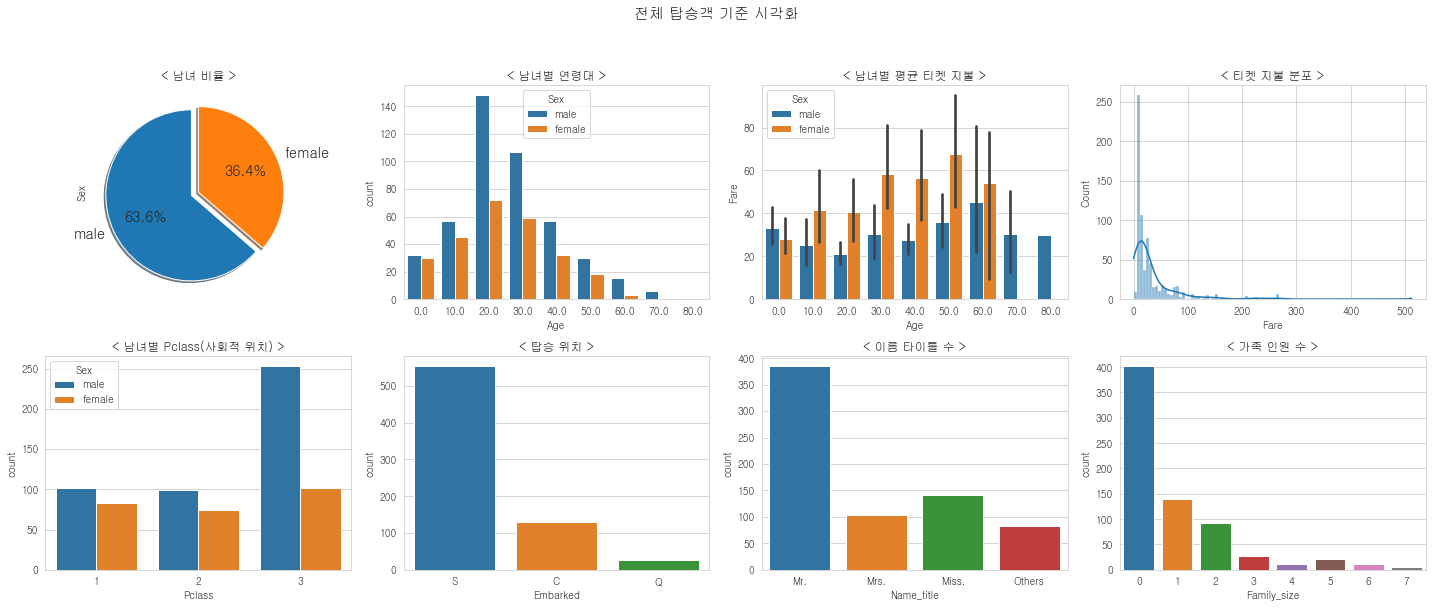

In [70]:
## Total 배 탑승객 남/녀 전체 시각화
plt.figure(figsize=(20,8))


# 1 graph
plt.subplot(2,4,1)
df.groupby(["Sex"])["Sex"].count().plot(kind="pie", startangle=90, autopct='%1.1f%%', explode=(0,0.09), 
                                            shadow=True, counterclock=False, colors = ["C1", "C0"],textprops={'size': 'x-large'})
plt.title(" < 남녀 비율 > ")


# 2 graph
plt.subplot(2,4, 2)
sns.countplot(x="Age", hue="Sex", data=df)
plt.title(" < 남녀별 연령대 > ")


# 3 graph
plt.subplot(2,4,3)
sns.barplot(x="Age", y="Fare", hue="Sex", data=df)
plt.title(" < 남녀별 평균 티켓 지불 > ")


# 4 graph
plt.subplot(2,4, 4)
sns.histplot(x=df["Fare"], kde=True)
plt.title(" < 티켓 지불 분포 > ")


# 5 graph
plt.subplot(2,4, 5)
sns.countplot(x="Pclass", hue="Sex", data=df)
plt.title(" < 남녀별 Pclass(사회적 위치) > ") 

# 6 graph
plt.subplot(2,4, 6)
sns.countplot(x="Embarked", data=df)
plt.title(" < 탑승 위치 > ") 

# 7 graph
plt.subplot(2,4, 7)
sns.countplot(x=df["Name_title"], data=df)
plt.title(" < 이름 타이틀 수 > ")


# 8 graph
plt.subplot(2,4,8)
sns.countplot(x="Family_size", data=df)
plt.title(" < 가족 인원 수 > ") 



# 맨 위 큰 제목
plt.suptitle(' 전체 탑승객 기준 시각화 ', fontsize=15, y=1.05)

# 레이아웃 설정 - 이쁘게 각 잡아 줌
plt.tight_layout()

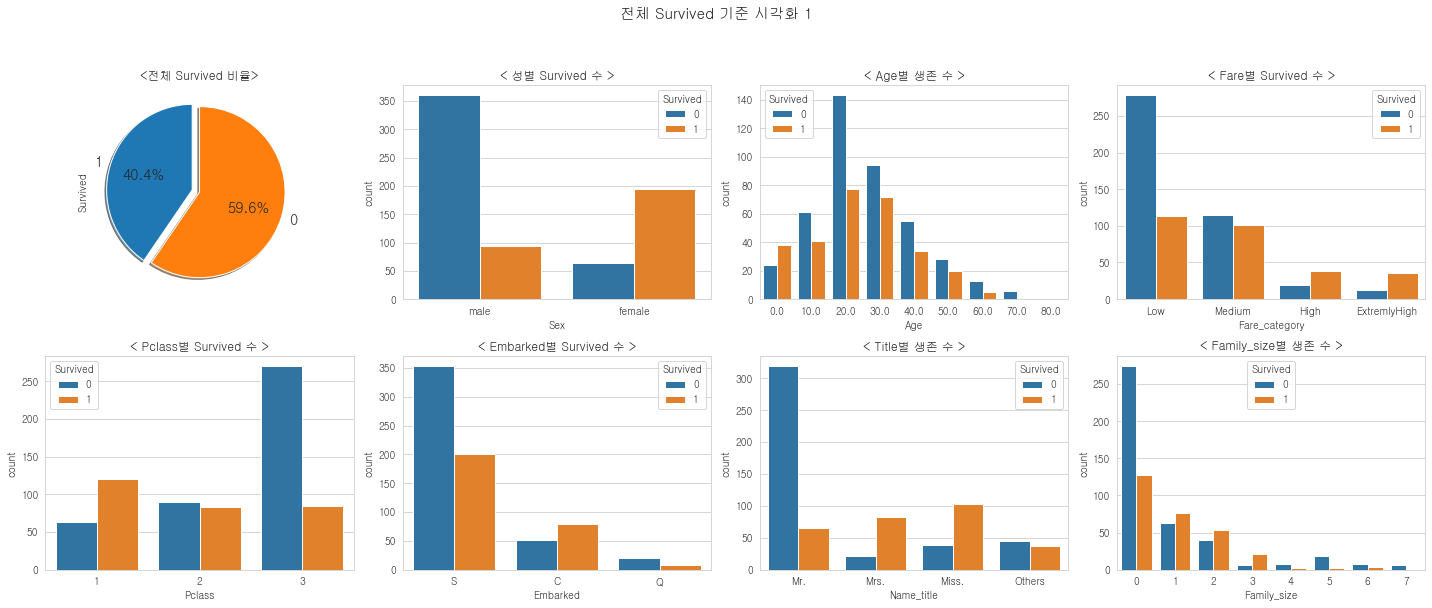

In [69]:
## 전체 - Survived Ratio
plt.figure(figsize=(20,8))

# 1 graph
plt.subplot(2,4,1)
df.groupby(["Survived"])["Survived"].count().plot(kind="pie", startangle=90, autopct='%1.1f%%', explode=(0,0.09),
                                            shadow=True, counterclock=False, colors = ["C1", "C0"],textprops={'size': 'x-large'})
plt.title(" <전체 Survived 비율> ")


# 2 graph
plt.subplot(2,4,2)
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title(" < 성별 Survived 수 > ")


# 3 graph
plt.subplot(2,4,3)
sns.countplot(x="Age", hue="Survived", data=df)
plt.title(" < Age별 생존 수 > ")


# 4 graph
plt.subplot(2,4,4)
sns.countplot(x="Fare_category", hue="Survived", data=df)
plt.title(" < Fare별 Survived 수 > ")


# 5 graph
plt.subplot(2,4,5)
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title(" < Pclass별 Survived 수 > ")


# 6 graph
plt.subplot(2,4,6)
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title(" < Embarked별 Survived 수 > ")


# 7 graph
plt.subplot(2,4,7)
sns.countplot(x="Name_title", hue="Survived", data=df)
plt.title( " < Title별 생존 수 > " )


# 8 graph
plt.subplot(2,4,8)
sns.countplot(x="Family_size", hue="Survived", data=df)
plt.title(" < Family_size별 생존 수 > ")


# 맨 위 큰 제목 설정
plt.suptitle(' 전체 Survived 기준 시각화 1 ', fontsize=15, y=1.05)

# 레이아웃 설정 - 이쁘게 각 잡아 줌
plt.tight_layout()